In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d


# 1. Meshgrid

In [83]:
nx, ny, nz = (4, 3, 2)
x = np.linspace(0, 3, nx)
y = np.linspace(0, 3, ny)
z = np.linspace(0, 2, nz)

x, y, z

(array([0., 1., 2., 3.]), array([0. , 1.5, 3. ]), array([0., 2.]))

## 2D Plane

(array([[0., 0., 0.],
        [1., 1., 1.],
        [2., 2., 2.],
        [3., 3., 3.]]),
 (4, 3))

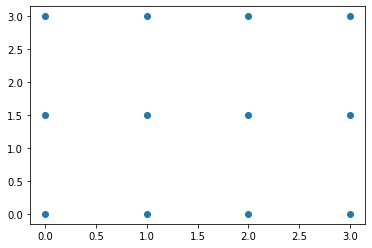

In [84]:
xv, yv = np.meshgrid(x, y, indexing='ij') # matrix indexing
 
x_list = []
y_list = []

for i in range(nx):
    for j in range(ny):
        x_list.append(xv[i,j])
        y_list.append(yv[i,j])

plt.scatter(x_list, y_list)

xv, xv.shape # M * N (4 * 3)

(array([[0., 1., 2., 3.],
        [0., 1., 2., 3.],
        [0., 1., 2., 3.]]),
 (3, 4))

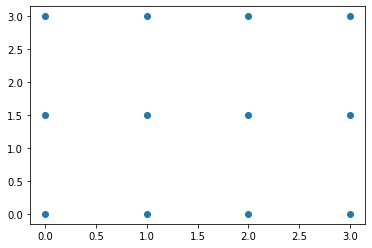

In [85]:
xv, yv = np.meshgrid(x, y, indexing='xy') # Cartesian indexing
 
x_list = []
y_list = []

for i in range(nx):
    for j in range(ny):
        x_list.append(xv[j,i])
        y_list.append(yv[j,i])

plt.scatter(x_list, y_list)

xv, xv.shape # M * N (3 * 4)

### 3D Space

(array([[[0., 0.],
         [0., 0.],
         [0., 0.]],
 
        [[1., 1.],
         [1., 1.],
         [1., 1.]],
 
        [[2., 2.],
         [2., 2.],
         [2., 2.]],
 
        [[3., 3.],
         [3., 3.],
         [3., 3.]]]),
 (4, 3, 2),
 (4, 3, 2),
 (4, 3, 2))

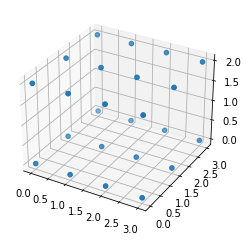

In [86]:
xv, yv, zv = np.meshgrid(x, y, z, indexing='ij') # matrix indexing
 
x_list = []
y_list = []
z_list = []

for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            x_list.append(xv[i,j])
            y_list.append(yv[i,j])
            z_list.append(zv[i,j])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_list, y_list, z_list)

xv, xv.shape, yv.shape, zv.shape # M * N * P ( 4 * 3 * 2)

In the 2-D case with inputs of length M and N, the outputs are of shape

- (M, N) for ‘ij’ indexing

- (N, M) for ‘xy’ indexing


In the 3-D case with inputs of length M, N and P, outputs are of shape 

- (M, N, P) for ‘ij’ indexing

- (N, M, P) for ‘xy’ indexing 



((3, 4, 2), (3, 4, 2), (3, 4, 2))

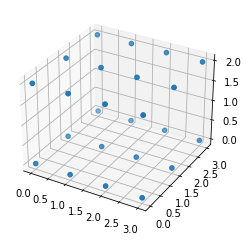

In [87]:
xv, yv, zv = np.meshgrid(x, y, z, indexing='xy') # Cartesian indexing
 
x_list = []
y_list = []
z_list = []

for i in range(nx):
    for j in range(ny):
        for k in range(nz):
            x_list.append(xv[j,i])
            y_list.append(yv[j,i])
            z_list.append(zv[j,i])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_list, y_list, z_list)

xv.shape, yv.shape, zv.shape

# 2. Multivariate Gaussion

In [88]:
def Gaussian2D(X, mu, C):
    D, N = X.shape

    det_C = np.linalg.det(C)
    inv_C = np.linalg.inv(C)

    den = np.sqrt((2 * np.pi)** D * det_C)
    # den = 2 * np.pi * det_C

    expo = np.exp(-0.5 * np.dot((X - mu).T, np.dot(inv_C, X - mu)))
    
    return expo / den

def twoDGaussianPlot(nx, ny, mu, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    
    xv, yv = np.meshgrid(x, y, indexing='ij')
    z = np.zeros([nx, ny])
    
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([xv[i, j], yv[i, j]]).reshape(-1, 1) # 2 * 1
            z[i, j] = Gaussian2D(xvec, mu, C)

    return xv, yv, z


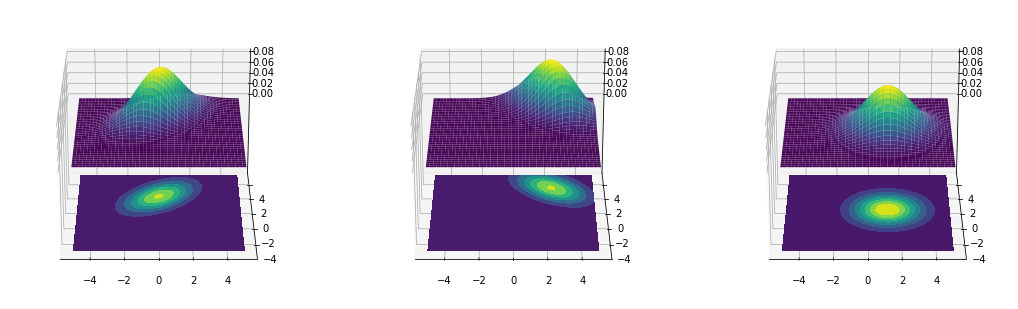

In [193]:
nx, ny = 50, 40

fig = plt.figure(figsize=(18, 24))

# 
m1 = np.array([0,2]).reshape(-1, 1)
C1 = np.array([[2,1], [1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
ax = fig.add_subplot(131,projection='3d')
ax.plot_surface(Xp, Yp, Zp, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=plt.get_cmap("viridis"))
ax.contourf(Xp, Yp, Zp, zdir='z', offset=-0.15, cmap=plt.get_cmap("viridis"))
ax.set_zlim(-0.15, 0.04)
ax.set_zticks(np.linspace(0,0.08,5))
ax.view_init(25, -90)

# 
m2 = np.array([2.4, 3.2]).reshape(-1, 1)
c2 = np.array([[2, -1], [-1, 2]])
Xp2, Yp2, Zp2 = twoDGaussianPlot(nx, ny, m2, c2)

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(Xp2, Yp2, Zp2, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=plt.get_cmap("viridis"))
ax.contourf(Xp2, Yp2, Zp2, zdir='z', offset=-0.15, cmap=plt.get_cmap("viridis"))
ax.set_zlim(-0.15, 0.04)
ax.set_zticks(np.linspace(0,0.08,5))
ax.view_init(25, -90)

#
m3 = np.array([1.2, 0.2]).reshape(-1, 1)
c3 = np.array([[2, 0], [0, 2]])
Xp3, Yp3, Zp3 = twoDGaussianPlot(nx, ny, m3, c3)
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(Xp3, Yp3, Zp3, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=plt.get_cmap("viridis"))
ax.contourf(Xp3, Yp3, Zp3, zdir='z', offset=-0.15, cmap=plt.get_cmap("viridis"))
ax.set_zlim(-0.15, 0.04)
ax.set_zticks(np.linspace(0,0.08,5))
ax.view_init(25, -90)



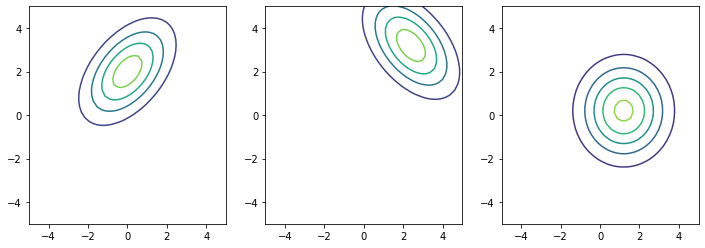

In [196]:
# Plot contours
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].contour(Xp, Yp, Zp, 5)
ax[1].contour(Xp2, Yp2, Zp2, 5)
ax[2].contour(Xp3, Yp3, Zp3, 5)


# 3. Sample

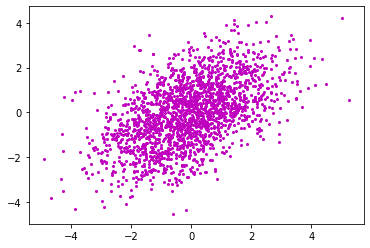

In [197]:
# symmetric matrix
C = np.array([[ 2.0, 1.0 ], [ 1.0, 2.0 ]])

# A = LL^T
L = np.linalg.cholesky(C)

X = np.random.randn(2, 2000)
Y = L @ X

fig, ax = plt.subplots()
ax.scatter(Y[0], Y[1], c="m", s=4)
